In [7]:
import pandas as pd # type: ignore

base_path = "/Users/maxgallardo/Documents/TEC/Semestres/Semestre 7/TC3006C/AI-DS/ACT 1"

# Definir los paths a los archivos
train_data_path = f"{base_path}/training.txt"
test_data_path = f"{base_path}/test.txt"

# Cargar los archivos en DataFrames
df_train = pd.read_csv(train_data_path, header=None)
df_test = pd.read_csv(test_data_path, header=None)

# Mostrar las primeras filas de los datos para verificar la carga correcta
df_train.head(), df_test.head()


(     0    1    2      3      4    5    6      7    8    9    10   11   12  \
 0  58.0  1.0  2.0  120.0  284.0  0.0  2.0  160.0  0.0  1.8  2.0  0.0  3.0   
 1  76.0  0.0  3.0  140.0  197.0  0.0  1.0  116.0  0.0  1.1  2.0  0.0  3.0   
 2  68.0  0.0  3.0  120.0  211.0  0.0  2.0  115.0  0.0  1.5  2.0  0.0  3.0   
 3  57.0  1.0  4.0  165.0  289.0  1.0  2.0  124.0  0.0  1.0  2.0  3.0  7.0   
 4  59.0  1.0  4.0  170.0  326.0  0.0  2.0  140.0  1.0  3.4  3.0  0.0  7.0   
 
         13  
 0  Present  
 1  Absence  
 2  Absence  
 3  Present  
 4  Present  ,
      0    1    2      3      4    5    6      7    8    9    10   11   12  \
 0  51.0  1.0  3.0  100.0  222.0  0.0  0.0  143.0  1.0  1.2  2.0  0.0  3.0   
 1  65.0  0.0  3.0  160.0  360.0  0.0  2.0  151.0  0.0  0.8  1.0  0.0  3.0   
 2  38.0  1.0  1.0  120.0  231.0  0.0  0.0  182.0  1.0  3.8  2.0  0.0  7.0   
 3  50.0  1.0  3.0  129.0  196.0  0.0  0.0  163.0  0.0  0.0  1.0  0.0  3.0   
 4  56.0  0.0  4.0  134.0  409.0  0.0  2.0  150.0  1.0 

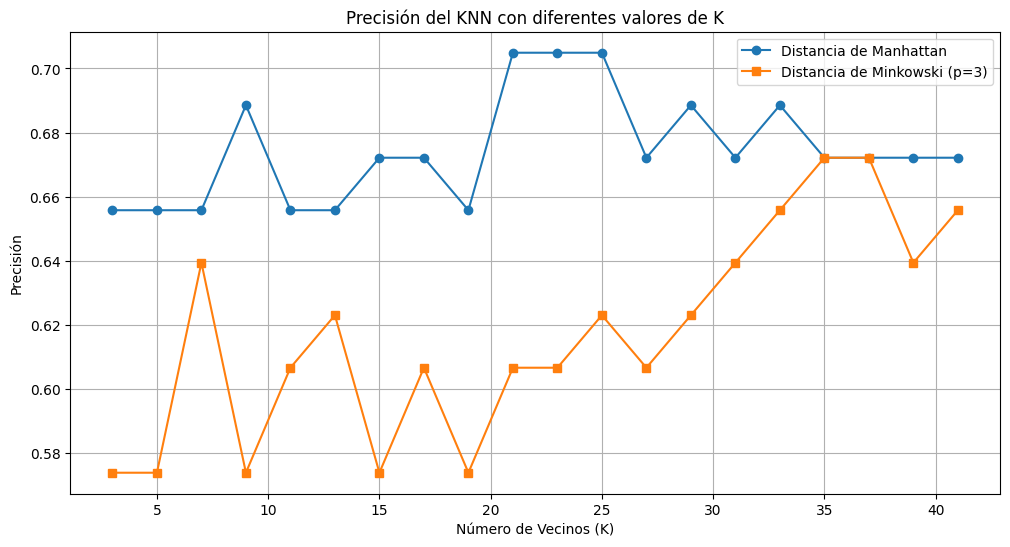

In [8]:
import numpy as np
from scipy.spatial.distance import cityblock, minkowski
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Separar características y etiquetas en los conjuntos de datos
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

# Definir funciones de distancia
def manhattan_distance(x, y):
    return cityblock(x, y)

def minkowski_distance(x, y, p=3):
    return minkowski(x, y, p)

# Función para calcular la precisión variando el valor de K
def evaluate_knn_with_distance(X_train, y_train, X_test, y_test, distance_func, k_values):
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_func)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    return accuracies

# Rango de valores de K
k_values = range(3, 42, 2)

# Evaluar con distancia de Manhattan
manhattan_accuracies = evaluate_knn_with_distance(X_train, y_train, X_test, y_test, 'manhattan', k_values)

# Evaluar con distancia de Minkowski (p=3)
minkowski_accuracies = evaluate_knn_with_distance(X_train, y_train, X_test, y_test, lambda x, y: minkowski_distance(x, y, p=3), k_values)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(k_values, manhattan_accuracies, marker='o', label='Distancia de Manhattan')
plt.plot(k_values, minkowski_accuracies, marker='s', label='Distancia de Minkowski (p=3)')
plt.title('Precisión del KNN con diferentes valores de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


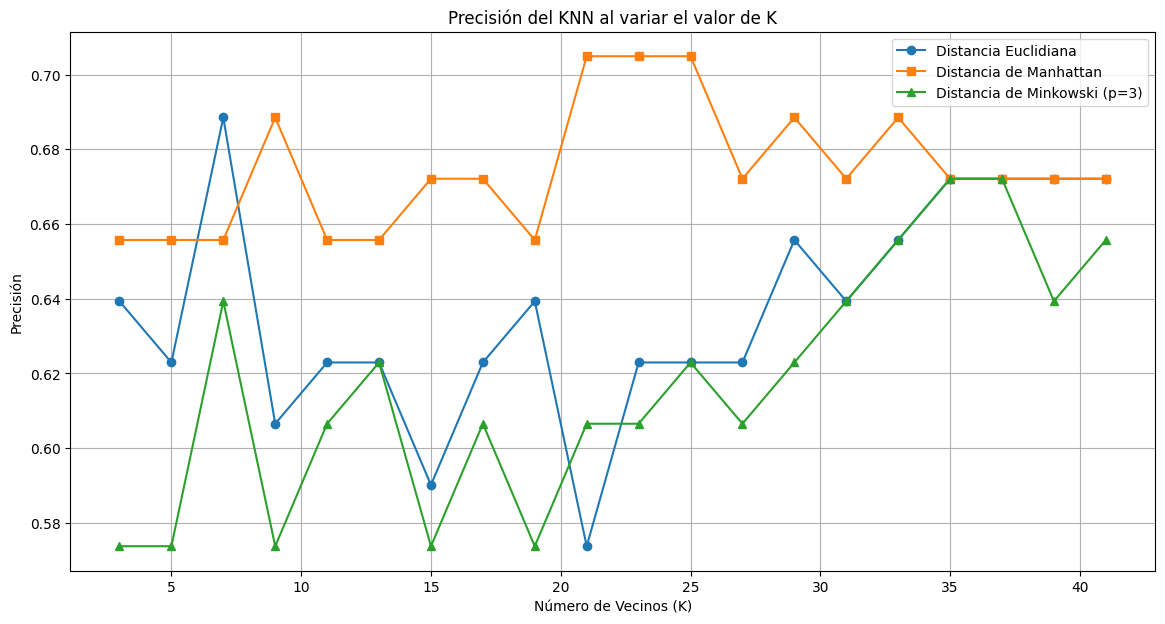

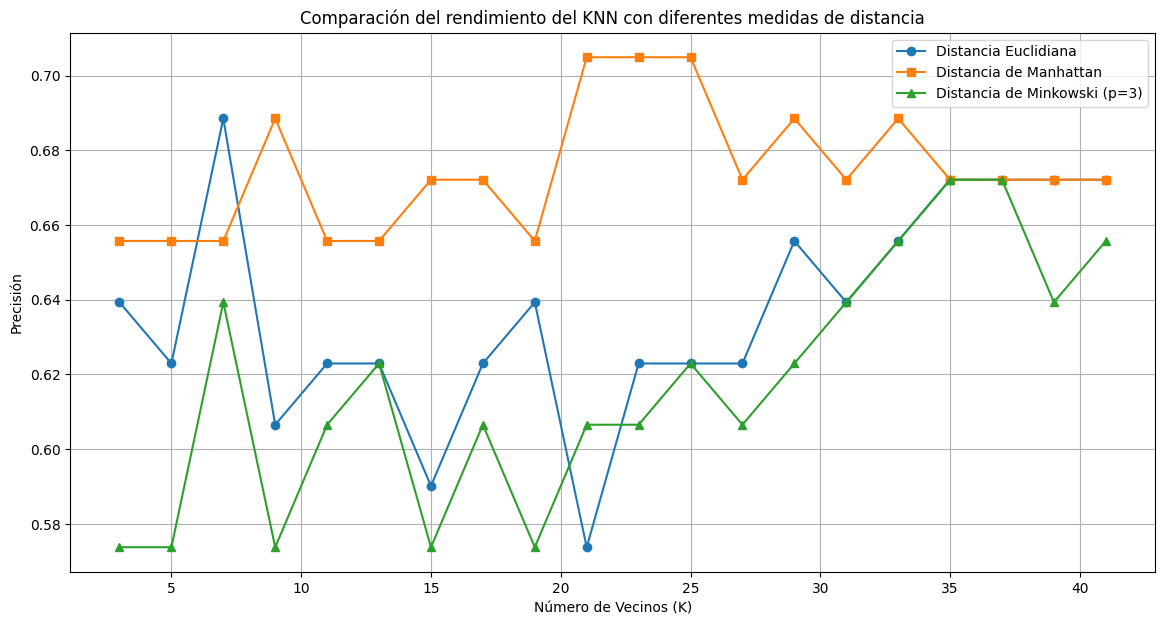

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Función para evaluar KNN con diferentes medidas de distancia
def evaluate_knn(X_train, y_train, X_test, y_test, k_values, distance_metric):
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    return accuracies

# Rango de valores de K
k_values = range(3, 42, 2)

# Evaluar la precisión con diferentes distancias
euclidean_accuracies = evaluate_knn(X_train, y_train, X_test, y_test, k_values, 'euclidean')
manhattan_accuracies = evaluate_knn(X_train, y_train, X_test, y_test, k_values, 'manhattan')
minkowski_accuracies = evaluate_knn(X_train, y_train, X_test, y_test, k_values, lambda x, y: minkowski(x, y, 3))

# Gráfico 1: Precisión del KNN al variar el valor de K
plt.figure(figsize=(14, 7))
plt.plot(k_values, euclidean_accuracies, marker='o', label='Distancia Euclidiana')
plt.plot(k_values, manhattan_accuracies, marker='s', label='Distancia de Manhattan')
plt.plot(k_values, minkowski_accuracies, marker='^', label='Distancia de Minkowski (p=3)')
plt.title('Precisión del KNN al variar el valor de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Comparación del rendimiento con diferentes medidas de distancia
plt.figure(figsize=(14, 7))
plt.plot(k_values, euclidean_accuracies, marker='o', label='Distancia Euclidiana')
plt.plot(k_values, manhattan_accuracies, marker='s', label='Distancia de Manhattan')
plt.plot(k_values, minkowski_accuracies, marker='^', label='Distancia de Minkowski (p=3)')
plt.title('Comparación del rendimiento del KNN con diferentes medidas de distancia')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/jn/h87m6rrs46s3rbwjv3hg5x2h0000gn/T/ipykernel_19353/2713777022.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_k_df.index, y='Accuracy', data=best_k_df, palette=['orange', 'blue', 'green'])


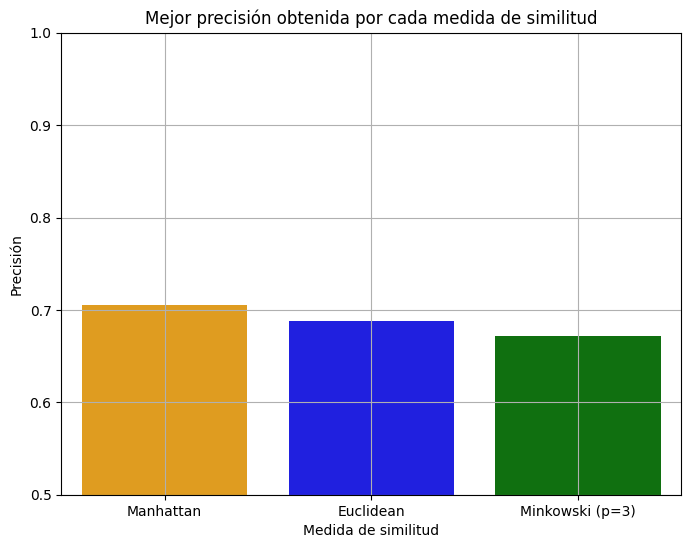

In [10]:
import seaborn as sns

# Obtener el mejor valor de K y su precisión para cada medida de distancia
best_k_manhattan = max(zip(k_values, manhattan_accuracies), key=lambda x: x[1])
best_k_euclidean = max(zip(k_values, euclidean_accuracies), key=lambda x: x[1])
best_k_minkowski = max(zip(k_values, minkowski_accuracies), key=lambda x: x[1])

best_accuracies = {
    'Manhattan': best_k_manhattan,
    'Euclidean': best_k_euclidean,
    'Minkowski (p=3)': best_k_minkowski
}

# Crear un DataFrame para visualizar los resultados
best_k_df = pd.DataFrame.from_dict(best_accuracies, orient='index', columns=['Best K', 'Accuracy'])

# Generar el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=best_k_df.index, y='Accuracy', data=best_k_df, palette=['orange', 'blue', 'green'])
plt.title('Mejor precisión obtenida por cada medida de similitud')
plt.ylabel('Precisión')
plt.xlabel('Medida de similitud')
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()
